<a href="https://colab.research.google.com/github/Hannah1011/llm-response-clustering/blob/main/SpectralClustering_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00


In [40]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import SpectralClustering
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("/content/human_feedback_embedding_large_192_ver2.csv")
# Convert embeddings: string → numpy array
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)
matrix = np.vstack(df.embedding.values)
matrix.shape

(690, 192)

In [42]:
n_clusters = 10
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
labels = spectral.fit_predict(matrix)

In [43]:
# 차원 축소 (PCA + t-SNE 조합)
# pca = PCA(n_components=96)
# reduced_embeddings = pca.fit_transform(matrix)

# tsne = TSNE(n_components=2, random_state=42)
# tsne_result = tsne.fit_transform(matrix)

umap_result = umap.UMAP(n_components=2).fit_transform(matrix)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap="plasma", alpha=0.5)
plt.colorbar(label="Cluster")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title(f"Spectral Clustering result (K={n_clusters})")
plt.show()

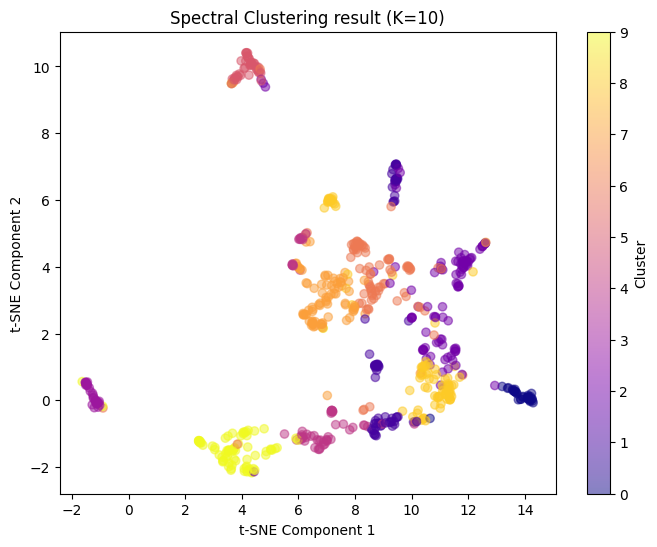

In [44]:
# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels, cmap="plasma", alpha=0.5)
plt.colorbar(label="Cluster")
plt.xlabel("umap Component 1")
plt.ylabel("umap Component 2")
plt.title(f"Spectral Clustering result (K={n_clusters})")
plt.show()

In [37]:
# ✅ 6. 결과를 데이터프레임에 저장
df["cluster"] = labels  # 클러스터 라벨 추가
df["cluster"].value_counts()

,count
cluster,
2,99
8,93
7,87
6,85
9,80
1,73
4,65
5,43
0,33


In [38]:
df.groupby("cluster").quality.mean().sort_values()

,quality
cluster,
1,0.808219
8,0.849462
9,0.850000
3,0.875000
4,0.876923
2,0.878788
7,0.885057
6,0.929412
0,0.939394


In [27]:
cluster_avg_quality = df.groupby("cluster").quality.mean().reset_index()
cluster_avg_quality.columns = ["cluster", "cluster_avg_quality"]
cluster_avg_quality['cluster_avg_quality'] = cluster_avg_quality['cluster_avg_quality'].round(3)
df = pd.merge(df, cluster_avg_quality, on = "cluster", how = "left")

In [28]:
output_path = "./human_feedback_ver2_192_sc.csv"
column_needed = ["coach_no","name", "quality", "created_at", "query",	"answer",	"combined","guide_index","reason", "n_tokens","cluster",	"cluster_avg_quality"]
df.to_csv(output_path, columns = column_needed, index= False)